## Class 5

Reading Canada.xlsx file, then draw 
histogram, line graphs, area graphs, horizontal graphs etc

In [1]:
import pandas as pd
import numpy as np


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sb

In [6]:
import matplotlib as mpl

In [7]:
%ls datasets

adult.csv                  Cartwheeldata.csv  movies.csv
adultosenusat.csv          census.csv         nhanes_2015_2016.csv
airline_data.csv           coches.csv         pokemon.csv
antropometria00.csv        cwurData.csv       reg_data.csv
antropometria-dataset.csv  data.csv           sample_pivot.csv
Book3.csv                  headbrain.csv      tips.csv
Canada.xlsx                mic2.xlsx          weight-height.csv


In [8]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [9]:
path = 'datasets/Canada.xlsx'
df = pd.read_excel(path,
                   sheet_name = 'Canada by Citizenship',
                   skiprows = range(20), #<- este es para que se salte una portada que tiene este dataset en particular
                   skip_footer = 2 ,
                   engine = 'openpyxl'
                  )

In [10]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [12]:
df.drop(['Type', 'Coverage','AREA',  'REG', 'DEV',  'DevName'],
        axis = 1,
        inplace = True)
df.head()

,OdName,AreaName,RegName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [13]:
df.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName' : 'Region'},
          inplace = True)
df.head()

,Country,Continent,Region,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [14]:
df.columns

Index([  'Country', 'Continent',    'Region',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013],
      dtype='object')

In [15]:
all(isinstance(i,str) #Preguntamos si todas las columnas son string
    for i in df.columns)

False

In [16]:
df.columns = list(map(str,df.columns)) #<- para convertir todas las columnas a strings

In [17]:
df.columns

Index(['Country', 'Continent', 'Region', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [18]:
df.set_index('Country',
             inplace = True)
df.head(2)

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1450,1223,856,702,560,716,561,539,620,603


In [19]:
df['Total'] = df.iloc[:,2: ].sum(axis=1)

In [20]:
df.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [21]:
years = list(map(str,range(1980,2014)
                )
            )
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [22]:
import matplotlib.pyplot as plt

In [23]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [24]:
mpl.style.use('ggplot')

In [25]:
italia = df.loc['Italy',
                years]
italia

1980    1820
1981    2057
1982    1480
1983     820
1984     858
1985     667
1986     731
1987    1101
1988     885
1989    1068
1990     895
1991     711
1992     623
1993     663
1994     558
1995     508
1996     476
1997     491
1998     399
1999     410
2000     383
2001     410
2002     374
2003     321
2004     334
2005     344
2006     325
2007     320
2008     370
2009     429
2010     434
2011     374
2012     440
2013     545
Name: Italy, dtype: object

Text(7, 1190, 'Reason')

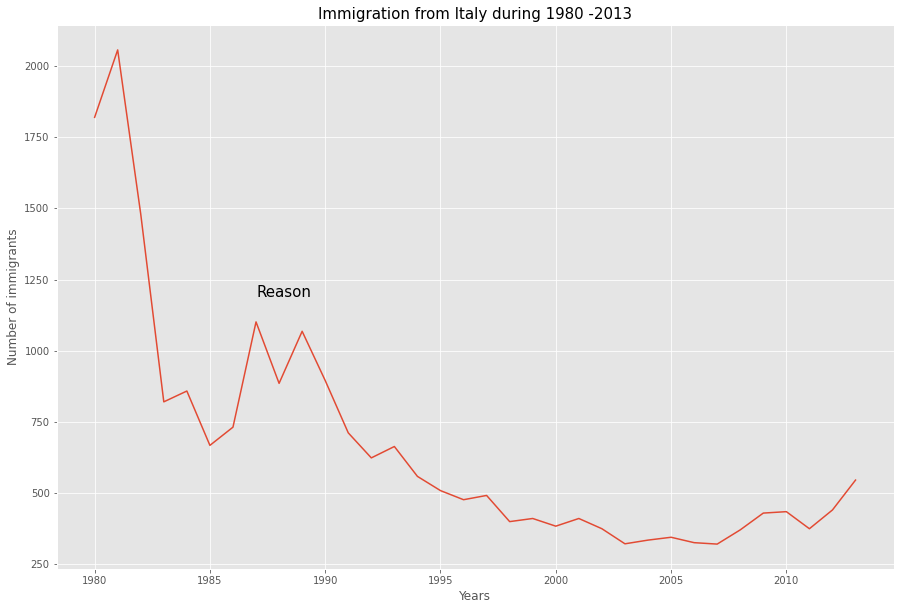

In [26]:
line_graph_italy = italia.plot(kind = 'line', 
                               figsize = (15,10)
                              )
plt.title('Immigration from Italy during 1980 -2013',
   fontsize = 15)
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.text(7, 1190, 'Reason', fontsize = 15)


In [27]:
G2 = df.loc[['China','India'],
                years]
G2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [28]:
G2 = G2.transpose()
G2

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704
1985,1816,4211
1986,1960,7150
1987,2643,10189
1988,2758,11522
1989,4323,10343


Text(0.5, 0, 'Years')

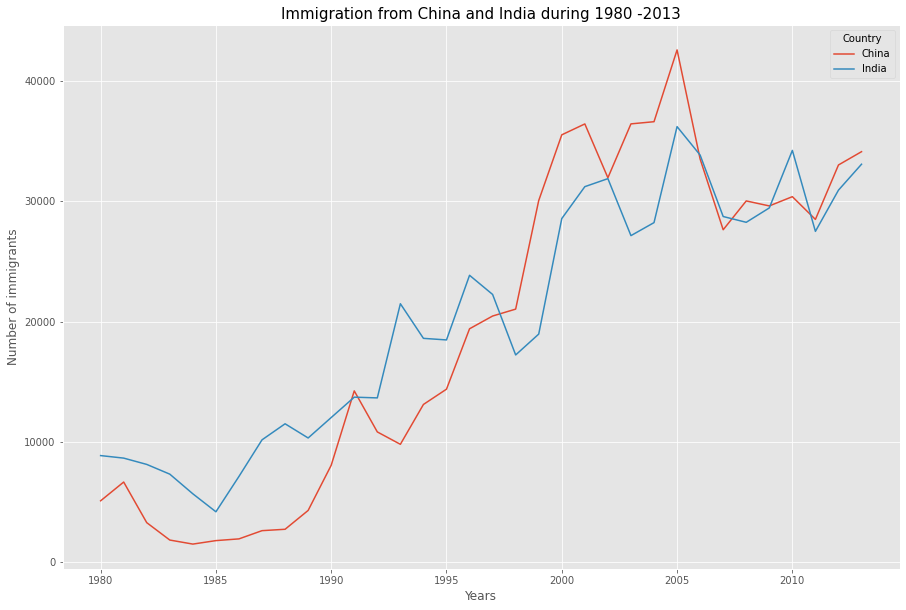

In [29]:
line_graph_G2 = G2.plot(kind = 'line', 
                               figsize = (15,10)
                              )
plt.title('Immigration from China and India during 1980 -2013',
   fontsize = 15)
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


#si queremos graficar los paises con mayor num de inmigrantes 

In [30]:
topf = df.sort_values(by ='Total',
                      ascending = False,
                      axis = 0,
                      )
top5 = topf.head(7)
top5

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Total,World,World,143137,128641,121175,89185,88272,84346,99351,152075,...,262242,251640,236753,247244,252170,280687,248748,257903,259021,6924212
India,Asia,Southern Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,World,World,44000,18078,16904,13635,14855,14368,13303,17304,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059
Philippines,Asia,South-Eastern Asia,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [31]:
top5 = top5[years].transpose()
top5

Country,Total,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines,Pakistan
1980,143137,8880,5123,22045,44000,6051,978
1981,128641,8670,6682,24796,18078,5921,972
1982,121175,8147,3308,20620,16904,5249,1201
1983,89185,7338,1863,10015,13635,4562,900
1984,88272,5704,1527,10170,14855,3801,668
1985,84346,4211,1816,9564,14368,3150,514
1986,99351,7150,1960,9470,13303,4166,691
1987,152075,10189,2643,21337,17304,7360,1072
1988,161585,11522,2758,27359,22279,8639,1334
1989,191550,10343,4323,23795,27118,11865,2261


In [32]:
top5.columns

Index(['Total', 'India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Unknown',
       'Philippines', 'Pakistan'],
      dtype='object', name='Country')

In [33]:
top5.drop(['Total','Unknown'],
        axis = 1,
        inplace = True)
top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Text(0.5, 0, 'Years')

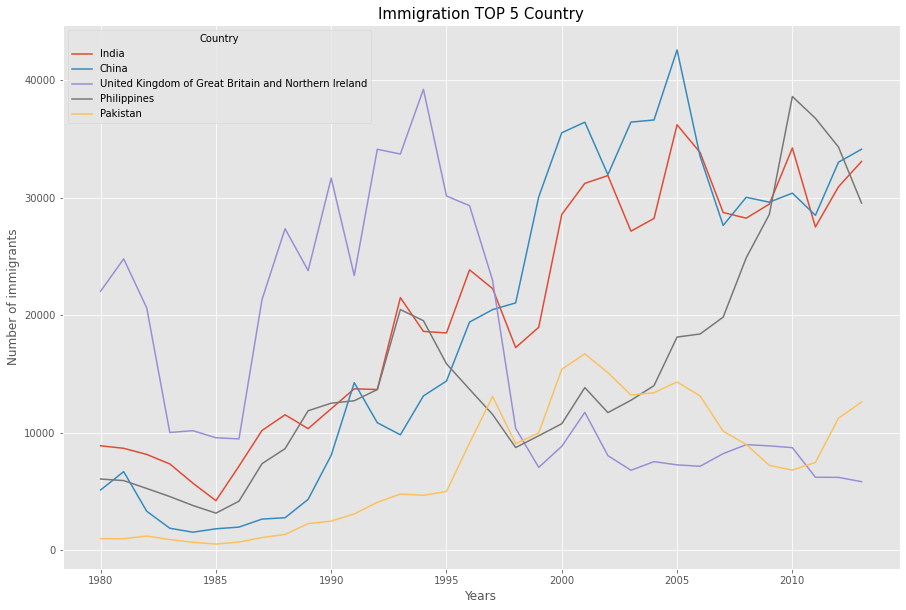

In [34]:
line_graph_top5 = top5.plot(kind = 'line', 
                               figsize = (15,10)
                              )
plt.title('Immigration TOP 5 Country',
   fontsize = 15)
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


## Area plots(Staked line plot) 

Text(0.5, 0, 'Years')

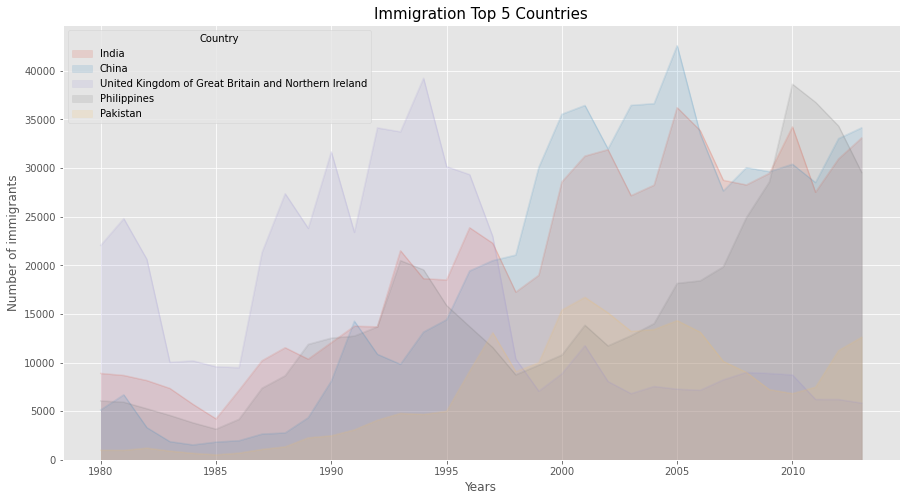

In [35]:
top5 = top5.plot(kind = 'area',
                 figsize = (15,8),
                  stacked = False, #Do NOT aggragating the values
                alpha = 0.15) # Intensidad del area de la grafica
plt.title('Immigration Top 5 Countries', fontsize = 15)
plt.ylabel('Number of immigrants')
plt.xlabel('Years')


## Histogram 

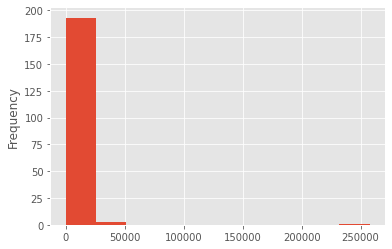

In [39]:
df['2012'].plot(kind = 'hist')

#ajuste de los numeros para saber que estamos graficando 

In [41]:
np.histogram(df['2012'])

(array([193,   3,   0,   0,   0,   0,   0,   0,   0,   1]),
 array([     0. ,  25790.3,  51580.6,  77370.9, 103161.2, 128951.5,
        154741.8, 180532.1, 206322.4, 232112.7, 257903. ]))

In [42]:
count, bin_edges = np.histogram(df['2012'])
print('counts\t\t:', count) #La t es un tab para tratar de hacer coincidir los dos resultados 
print('Bin edges \t:',bin_edges)

counts		: [193   3   0   0   0   0   0   0   0   1]
Bin edges 	: [     0.   25790.3  51580.6  77370.9 103161.2 128951.5 154741.8 180532.1
 206322.4 232112.7 257903. ]


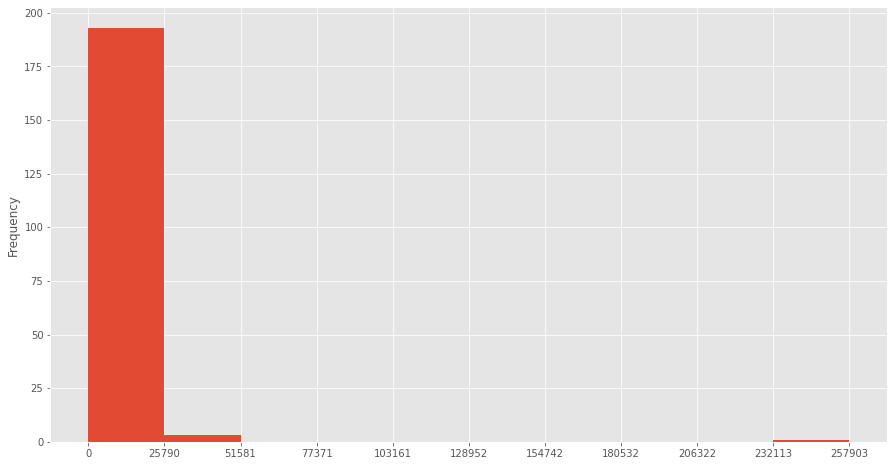

In [45]:
df['2012'].plot(kind='hist',
                figsize = (15, 8),
                xticks = bin_edges)
plt.show()

In [ ]:
xmin = 0
xmax = bin_edges)